In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
X = data.data # .dataにデータがある

In [5]:
dir(data)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [6]:
X.shape

(150, 4)

In [7]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [8]:
data.feature_names #特徴の意味

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
y = data.target # 教師データ

In [12]:
y.shape

(150,)

In [13]:
data.target_names # label names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
print(data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [15]:
from sklearn import linear_model

In [16]:
clf = linear_model.LogisticRegression()

In [17]:
# 訓練用とテスト用のデータを分割
n_sample = X.shape[0]
n_train = n_sample // 2 
n_test = n_sample - n_train

In [18]:
train_index = range(0, n_train)
test_index = range(n_train, n_sample)

In [19]:
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [20]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
print(clf.score(X_train, y_train))

1.0


In [22]:
print(clf.score(X_test, y_test))

0.3333333333333333


## 0.33...なぜ？ ｰ>　原因は、データ分割のやり方がわるい。ランダムに取らなければ、ならない

In [23]:
# ランダムにデータを分割するモジュール
from sklearn.model_selection import ShuffleSplit

In [24]:
ss = ShuffleSplit(n_splits=1, #分割数
                         train_size=0.5,
                         test_size=0.5,
                         random_state=0) #乱数シード（０だと、再現する）

In [25]:
# 学習データとテストデータのインデックスを作成
train_index, test_index = next(ss.split(X))

In [26]:
train_index # ランダム化後

array([  3, 149,  98,   6,  68, 109,  96,  12, 102, 120, 104, 128,  46,
        11, 110, 124,  41, 148,   1, 113, 139,  42,   4, 129,  17,  38,
         5,  53, 143, 105,   0,  34,  28,  55,  75,  35,  23,  74,  31,
       118,  57, 131,  65,  32, 138,  14, 122,  19,  29, 130,  49, 136,
        99,  82,  79, 115, 145,  72,  77,  25,  81, 140, 142,  39,  58,
        88,  70,  87,  36,  21,   9, 103,  67, 117,  47])

In [27]:
test_index # ランダム化後

array([114,  62,  33, 107,   7, 100,  40,  86,  76,  71, 134,  51,  73,
        54,  63,  37,  78,  90,  45,  16, 121,  66,  24,   8, 126,  22,
        44,  97,  93,  26, 137,  84,  27, 127, 132,  59,  18,  83,  61,
        92, 112,   2, 141,  43,  10,  60, 116, 144, 119, 108,  69, 135,
        56,  80, 123, 133, 106, 146,  50, 147,  85,  30, 101,  94,  64,
        89,  91, 125,  48,  13, 111,  95,  20,  15,  52])

In [28]:
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [29]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
clf.score(X_train, y_train)

0.92

In [31]:
clf.score(X_test, y_test)

0.84

In [33]:
# 検証用
ss10 = ShuffleSplit(n_splits=10, #分割数
                         train_size=0.5,
                         test_size=0.5,
                         random_state=0) #乱数シード（０だと、再現する）

In [34]:
scores = []

In [37]:
for train_index, test_index in ss.split(X):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

scores = np.array(scores)

In [38]:
scores

array([0.84      , 0.93333333, 0.90666667, 1.        , 0.90666667,
       0.93333333, 0.94666667, 1.        , 0.90666667, 0.88      ,
       0.84      , 0.93333333, 0.90666667, 1.        , 0.90666667,
       0.93333333, 0.94666667, 1.        , 0.90666667, 0.88      ])

In [46]:
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100,  scores.std() * 100))

92.53 +/- 4.70 %


In [47]:
# matplotlibの準備
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
train_sizes = np.arange(0.1, 1.0, 0.1)

In [61]:
all_mean = []
all_std = []

for train_size in train_sizes:
    ss = ShuffleSplit(n_splits=100, 
                      train_size=train_size,
                     test_size=1-train_size)
    scores = []
    for train_index, test_index in ss.split(X):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]
        
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)
    
    scores = np.array(scores)
    all_mean.append(scores.mean() * 100)
    all_std.append(scores.std() * 100)

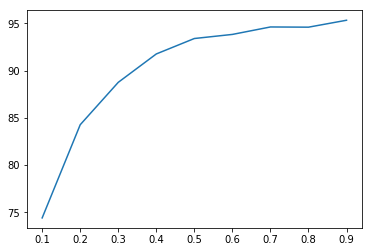

In [64]:
plt.plot(train_sizes, all_mean)

Text(0.5,1,'Average of 10 hold-out tests for different training size')

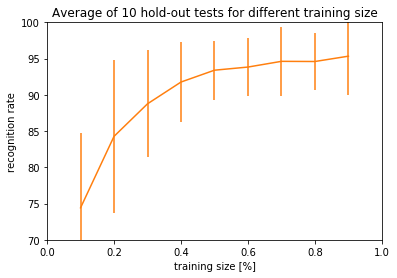

In [67]:
plt.plot(train_sizes, all_std)
plt.ylim(70, 100)
plt.xlim(0, 1)
plt.errorbar(train_sizes, all_mean, yerr=all_std)
plt.xlabel("training size [%]")
plt.ylabel("recognition rate")
plt.title("Average of 10 hold-out tests for different training size")

## テスト手法
 - Cross Validation: 
 　　例：４区画に区切る。 
   　　　１区画目：テスト用、２から３区画目で学習を実施 
      　　２区画目：テスト用、１、３から４区画を学習用 
        　３，４と続ける 
 - Leave one out：データ数が少ないときの手法。やり方はCross Validationとほぼ同じ 
 　別名、ジャックナイフ法 　
    例：１０個のデータ 
    　　　１個目をテスト用、２－１０個目を学習用 
       　　２個目をテスト用、１、３－１０個目を学習用 
         　 ３個目以降。。。上の手順を繰り返す 

## Stratified
 - 層化：データを区分けした各ブロックに含まれるグループの比率を同じに近づけるようにする